In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as seaborn
import streamlit as st
import tensorflow as tf
import joblib
import seaborn as  sns


In [11]:
data = pd.read_csv('housing_new.csv')
data = data.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])
data = data[['new_date','flat_type','resale_price',]]

In [12]:
data.info

<bound method DataFrame.info of            new_date flat_type  resale_price
0       1990.083333    1 ROOM        9000.0
1       1990.083333    1 ROOM        6000.0
2       1990.083333    1 ROOM        8000.0
3       1990.083333    1 ROOM        6000.0
4       1990.083333    3 ROOM       47200.0
...             ...       ...           ...
869640  2024.916667    5 ROOM      608000.0
869641  2024.916667    5 ROOM      686000.0
869642  2024.916667    5 ROOM      700000.0
869643  2024.916667    5 ROOM      720000.0
869644  2024.916667    5 ROOM      670000.0

[869645 rows x 3 columns]>

In [13]:
for flat_type_value in data['flat_type'].unique():
    # Initialize an empty list to collect rows
    rows = []

    # Iterate through each row in the DataFrame
    for _, row in data.iterrows():
        if row['flat_type'] == flat_type_value:
            # Add the row to the list
            rows.append(row)

    # Convert the list of rows to a DataFrame
    flat_df = pd.DataFrame(rows)


    # Save the DataFrame to a CSV file with the flat_type value as the filename
    flat_df.to_csv(f'Flat_type/{flat_type_value}.csv', index=False)


In [122]:
one_room = pd.read_csv('Flat_type/1 ROOM.csv')

one_room = one_room.drop(columns='flat_type')
statistics = one_room.groupby('new_date').agg(
    mean=('resale_price', 'mean'),
    median=('resale_price', 'median'),
    std=('resale_price', 'std'),
    high=('resale_price', 'max'),
    low=('resale_price', 'min'),
  
).reset_index()

# Merge statistics back into the original DataFrame
one_room = pd.merge(one_room, statistics, on='new_date', how='left')

# Drop the 'resale_price' column
one_room = one_room.drop(columns=['resale_price'])

# Drop duplicates for the same 'new_date' and keep one row per 'new_date'
one_room = one_room.drop_duplicates(subset=['new_date'])

one_room['prev_price'] = one_room['mean'].shift(1)

# Fill NaN values created by lag and rolling operations with 0
one_room = one_room.fillna(0)
# Display the updated DataFrame
print(one_room)


         new_date           mean    median           std      high       low  \
0     1990.083333    7711.111111    7300.0   1273.228617    9500.0    6000.0   
9     1990.166667    7733.333333    7400.0    773.813853   10000.0    7300.0   
21    1990.250000    7366.666667    7000.0   1975.685535    9500.0    5600.0   
24    1990.333333    8166.666667    7300.0   1767.295486   10200.0    7000.0   
27    1990.416667    8450.000000    8500.0   1703.819239   10400.0    6000.0   
...           ...            ...       ...           ...       ...       ...   
1303  2024.416667  242000.000000  242000.0      0.000000  242000.0  242000.0   
1304  2024.583333  245000.000000  245000.0      0.000000  245000.0  245000.0   
1305  2024.666667  255000.000000  255000.0      0.000000  255000.0  255000.0   
1306  2024.833333  280000.000000  280000.0      0.000000  280000.0  280000.0   
1307  2024.916667  271666.666667  268000.0  26689.573495  300000.0  247000.0   

         prev_price  
0          0.0000

In [123]:
# Count the number of NaN values in each column
nan_count = one_room.isnull().sum()
print("Count of NaN values in each column:")
print(nan_count)


Count of NaN values in each column:
new_date      0
mean          0
median        0
std           0
high          0
low           0
prev_price    0
dtype: int64


In [124]:
# Replace all NaN values with 0
one_room = one_room.fillna(0)

# Display the updated DataFrame
print(one_room)


         new_date           mean    median           std      high       low  \
0     1990.083333    7711.111111    7300.0   1273.228617    9500.0    6000.0   
9     1990.166667    7733.333333    7400.0    773.813853   10000.0    7300.0   
21    1990.250000    7366.666667    7000.0   1975.685535    9500.0    5600.0   
24    1990.333333    8166.666667    7300.0   1767.295486   10200.0    7000.0   
27    1990.416667    8450.000000    8500.0   1703.819239   10400.0    6000.0   
...           ...            ...       ...           ...       ...       ...   
1303  2024.416667  242000.000000  242000.0      0.000000  242000.0  242000.0   
1304  2024.583333  245000.000000  245000.0      0.000000  245000.0  245000.0   
1305  2024.666667  255000.000000  255000.0      0.000000  255000.0  255000.0   
1306  2024.833333  280000.000000  280000.0      0.000000  280000.0  280000.0   
1307  2024.916667  271666.666667  268000.0  26689.573495  300000.0  247000.0   

         prev_price  
0          0.0000

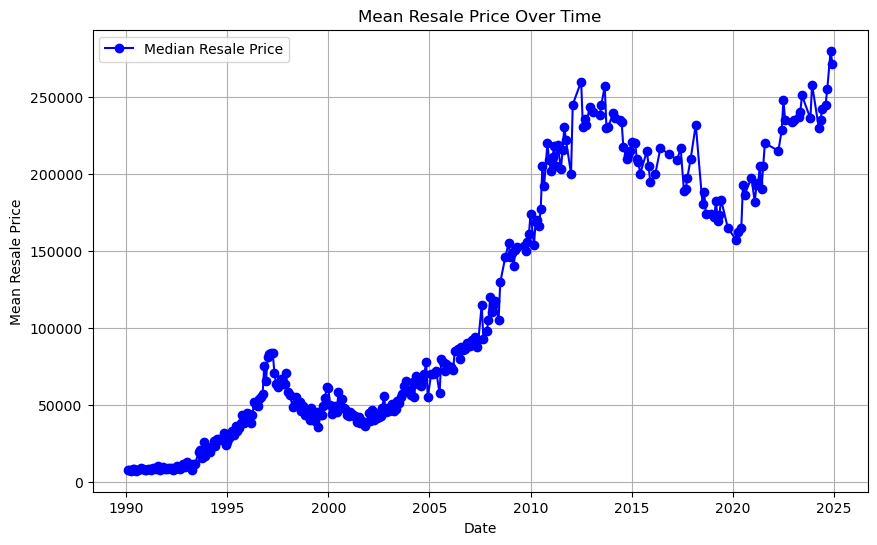

In [125]:

# Assuming 'one_room' is the DataFrame with 'new_date' and 'median' columns
plt.figure(figsize=(10, 6))
plt.plot(one_room['new_date'], one_room['mean'], marker='o', linestyle='-', color='b', label='Median Resale Price')

# Labeling the axes and title
plt.xlabel('Date')
plt.ylabel('Mean Resale Price')
plt.title('Mean Resale Price Over Time')

# Display the plot
plt.legend()
plt.grid(True)
plt.show()


Correlation Matrix:
            new_date      mean    median       std      high       low  \
new_date    1.000000  0.922239  0.923715 -0.031857  0.909293  0.923166   
mean        0.922239  1.000000  0.999604 -0.008503  0.993742  0.997251   
median      0.923715  0.999604  1.000000 -0.022816  0.991182  0.997791   
std        -0.031857 -0.008503 -0.022816  1.000000  0.088766 -0.077173   
high        0.909293  0.993742  0.991182  0.088766  1.000000  0.984010   
low         0.923166  0.997251  0.997791 -0.077173  0.984010  1.000000   
prev_price  0.921815  0.992944  0.992789 -0.006590  0.986641  0.990159   

            prev_price  
new_date      0.921815  
mean          0.992944  
median        0.992789  
std          -0.006590  
high          0.986641  
low           0.990159  
prev_price    1.000000  


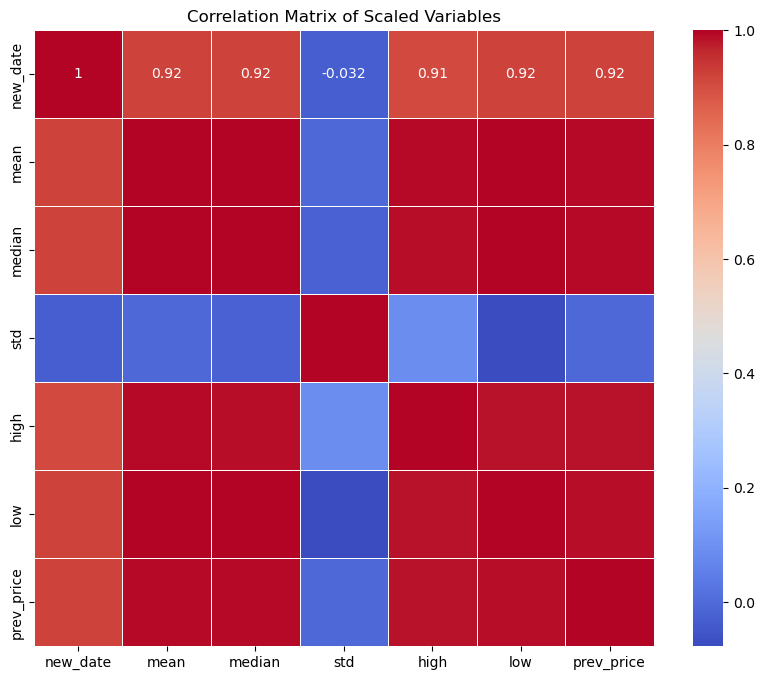

In [126]:
# Compute the correlation matrix for scaled data
correlation_matrix = one_room.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Scaled Variables')
plt.show()


In [127]:
one_room = one_room.drop(columns= 'std')

In [128]:
one_room.head()

,new_date,mean,median,high,low,prev_price
0,1990.083333,7711.111111,7300.0,9500.0,6000.0,0.000000
9,1990.166667,7733.333333,7400.0,10000.0,7300.0,7711.111111
21,1990.250000,7366.666667,7000.0,9500.0,5600.0,7733.333333
24,1990.333333,8166.666667,7300.0,10200.0,7000.0,7366.666667
27,1990.416667,8450.000000,8500.0,10400.0,6000.0,8166.666667


In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Assume your data is in a pandas DataFrame called 'data' with columns 'date' and 'price'


prices = data['resale_price'].values

# Feature scaling using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(prices.reshape(-1, 1))

# Function to create sequences for LSTM
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

# Set sequence length
sequence_length = 60

# Create sequences
X_seq, y_seq = create_sequences(scaled_data, sequence_length)

# Train-test split (70% train, 30% test)
train_size = int(len(X_seq) * 0.7)
X_train, X_test = X_seq[:train_size], X_seq[train_size:]
y_train, y_test = y_seq[:train_size], y_seq[train_size:]

# Reshape data for LSTM input
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Add EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,  # Increase if needed
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Make predictions on the test set
y_pred_scaled = model.predict(X_test)

# Inverse transform predictions and actual values
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate the model
mae = mean_absolute_error(y_test_unscaled, y_pred)
mse = mean_squared_error(y_test_unscaled, y_pred)
r2 = r2_score(y_test_unscaled, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.4f}")

# Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test_unscaled)), y_test_unscaled, label='Actual Values', color='blue', linestyle='-', marker='o')
plt.plot(range(len(y_pred)), y_pred, label='Predicted Values', color='red', linestyle='--', marker='x')
plt.xlabel('Time Steps')
plt.ylabel('Price')
plt.title('Actual vs Predicted Housing Prices')
plt.legend()
plt.show()

# Residuals plot
residuals = y_test_unscaled - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='black', linestyle='--')
plt.title("Residuals vs Predicted")
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.show()


c:\Users\firas\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
19023/19023 ━━━━━━━━━━━━━━━━━━━━ 1104s 58ms/step - loss: 8.5747e-04 - val_loss: 0.0027
Epoch 2/50
11389/19023 ━━━━━━━━━━━━━━━━━━━━ 7:49 62ms/step - loss: 7.0921e-04

KeyboardInterrupt: 

In [113]:
joblib.dump(lr_model, 'one_room_price_predictor.pkl')

['one_room_price_predictor.pkl']